# Credit card fraud Identification

importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =  pd.read_csv("Credit Card Fraud Detection.csv")

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Descriptive statistic analysis

In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.shape

(284807, 31)

Our dataset consist of 31 columns and 284807 test cases with no null values and all values in the dataset are in float except the class which is the target column also this is a classification problem.

# Visualization

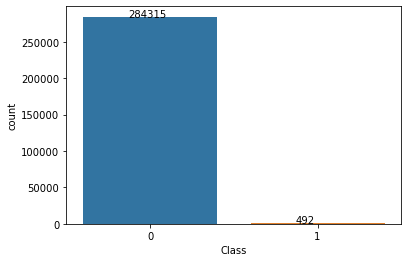

In [7]:
plt.figure()
ax = sns.countplot(x="Class",data=data)

for i in ax.patches:
    ax.annotate("{:}".format(i.get_height()),xy=(i.get_x() + i.get_width()/3,i.get_height()))
    
plt.show()

Data is highly imbalanced first to we have to make the dataset balanced and then create the model

Let's first split the dataset dependent and independent features

In [8]:
X = data.drop(columns="Class")

y = data.Class.copy()

print(X.head(), y.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [9]:
#  importing oversampler library

from imblearn.over_sampling import RandomOverSampler

In [10]:
ROs = RandomOverSampler(0.75)

X_bal, y_bal = ROs.fit_resample(X,y)

print(f"Shapes \nX: {X_bal.shape} \ny :{y_bal.shape}")

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


Shapes 
X: (497551, 30) 
y :(497551,)


Importing Libraries

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

Spliting of data

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_bal,y_bal,test_size=0.3,random_state=42)

# Logistic Regression

In [13]:
log_model = LogisticRegression(random_state=42)

log_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [14]:
y_logpred = log_model.predict(X_test)

print("\nLogistic Regression\n ",classification_report(y_test,y_logpred))
print("\naccuracy score:",accuracy_score(y_test,y_logpred))


Logistic Regression
                precision    recall  f1-score   support

           0       0.93      0.97      0.95     85334
           1       0.96      0.90      0.93     63932

    accuracy                           0.94    149266
   macro avg       0.95      0.94      0.94    149266
weighted avg       0.94      0.94      0.94    149266


accuracy score: 0.942913992469819


# Decision tree classifier

In [15]:
dc_model = DecisionTreeClassifier(random_state=42)

dc_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
dc_pred = dc_model.predict(X_test)

print(f"\nClassification Report Decision tree\n {classification_report(y_test,dc_pred)} \
      \naccuracy score :{accuracy_score(y_test,dc_pred)}")


Classification Report Decision tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85334
           1       1.00      1.00      1.00     63932

    accuracy                           1.00    149266
   macro avg       1.00      1.00      1.00    149266
weighted avg       1.00      1.00      1.00    149266
       
accuracy score :0.9997454209263998


# Random forest classifier

In [17]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [18]:
rf_pred = rf_model.predict(X_test)

print(f"\nClassification Report Decision tree\n {classification_report(y_test,rf_pred)} \
      \naccuracy score :{accuracy_score(y_test,rf_pred)}")


Classification Report Decision tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85334
           1       1.00      1.00      1.00     63932

    accuracy                           1.00    149266
   macro avg       1.00      1.00      1.00    149266
weighted avg       1.00      1.00      1.00    149266
       
accuracy score :0.9999665027534737


# Isolation forest 

fraction of outlier as contamination

In [21]:
val_count = y.value_counts()

outlier_fact = val_count[1]/val_count[0]

print(f"Factor of outlier in the data: {outlier_fact}")

Factor of outlier in the data: 0.0017304750013189597


In [22]:
isol_model = IsolationForest(contamination=outlier_fact,max_samples=len(X),random_state=42)

isol_model.fit(X,y)

IsolationForest(contamination=0.0017304750013189597, max_samples=284807,
                random_state=42)

In [23]:
isol_pred = isol_model.predict(X)

#replacing 1 as fraud and 0 as non-fraud
isol_pred[isol_pred==1]=0
isol_pred[isol_pred==-1]=1

print(f"\nClassification Report Decision tree\n {classification_report(y,isol_pred)} \
      \naccuracy score :{accuracy_score(y,isol_pred)}")


Classification Report Decision tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.31      0.31      0.31       492

    accuracy                           1.00    284807
   macro avg       0.65      0.65      0.65    284807
weighted avg       1.00      1.00      1.00    284807
       
accuracy score :0.9976159293837581


# From above models we conclude 

### Random forest classifier give us the highest accuracy with precision

## Confusion matrix for Random forest classifier

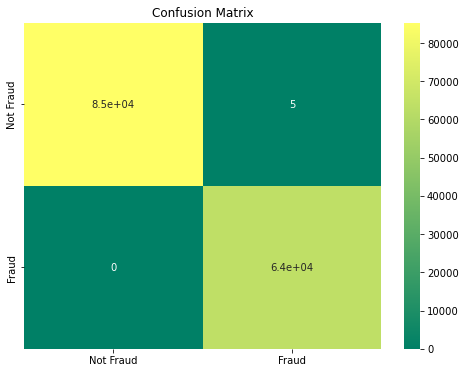

In [30]:
plt.figure(figsize=[8,6])

labels = ["Not Fraud", "Fraud"]

Confusion_mat = pd.DataFrame(confusion_matrix(y_test,rf_pred),columns=labels,index=labels)

sns.heatmap(Confusion_mat,annot=True,cmap="summer")
plt.title("Confusion Matrix")
plt.show()

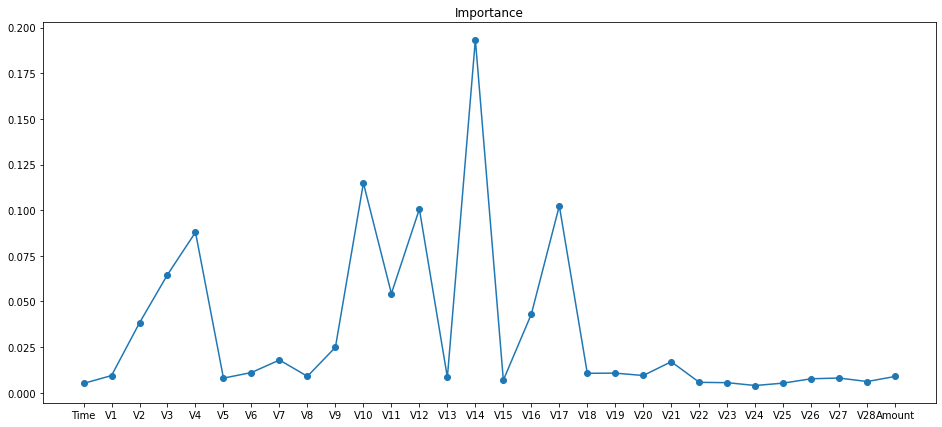

In [25]:
plt.figure(figsize=[16,7])
plt.plot(X.columns,rf_model.feature_importances_,"o-")
plt.title("Importance")
plt.show()

In [26]:
importance = pd.DataFrame(rf_model.feature_importances_,index=X.columns)

In [27]:
importance = importance.sort_values(by=0,ascending=False)

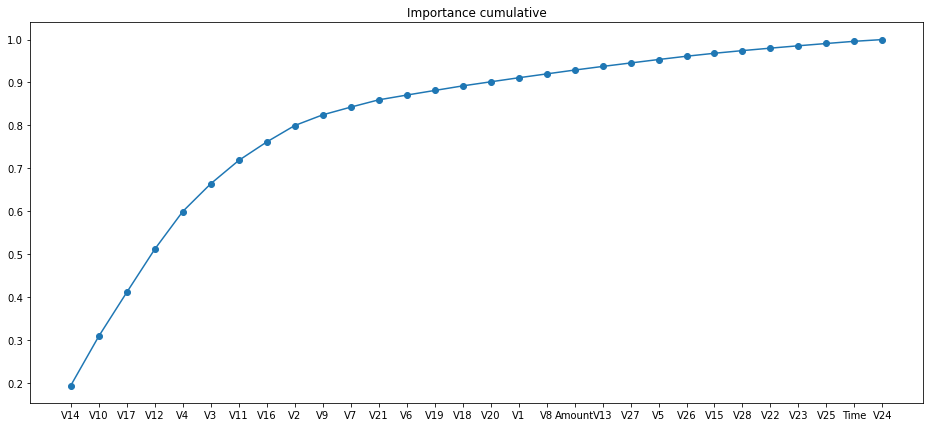

In [28]:
plt.figure(figsize=[16,7])
plt.plot(importance.cumsum(),"o-")
plt.title("Importance cumulative")
plt.show()